<a href="https://colab.research.google.com/github/emirhanbyrk/CNN-MODEL-/blob/main/GlobalAIHub_CNNModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Reading

import numpy as np
import cv2 
from google.colab.patches import cv2_imshow
from google.colab import drive
import glob 

drive.mount("/content/drive/")
image0 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/spectrograms/0/*.png")]
image1 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/spectrograms/1/*.png")]
image2 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/spectrograms/2/*.png")]
image3 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/spectrograms/3/*.png")]
image4 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/spectrograms/4/*.png")]
image5 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/spectrograms/5/*.png")]
image6 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/spectrograms/6/*.png")]
image7 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/spectrograms/7/*.png")]
image8 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/spectrograms/8/*.png")]
image9 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/spectrograms/9/*.png")]




Mounted at /content/drive/


In [1]:
#Grayscale

import numpy as np
import cv2 
from google.colab.patches import cv2_imshow
from google.colab import drive
import glob 
drive.mount("/content/drive/")

gray0 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/spectrograms/0/*.png")]
gray1 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/spectrograms/1/*.png")]
gray2 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/spectrograms/2/*.png")]
gray3 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/spectrograms/3/*.png")]
gray4 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/spectrograms/4/*.png")]
gray5 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/spectrograms/5/*.png")]
gray6 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/spectrograms/6/*.png")]
gray7 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/spectrograms/7/*.png")]
gray8 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/spectrograms/8/*.png")]
gray9 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/spectrograms/9/*.png")]

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Resizing
import os
import pandas as pd
import numpy as np

newsize = (128,128)
normalizedImg = np.zeros(newsize)
degerler = []

all_gray = []
all_gray.append(gray0)
all_gray.append(gray1)
all_gray.append(gray2)
all_gray.append(gray3)
all_gray.append(gray4)
all_gray.append(gray5)
all_gray.append(gray6)
all_gray.append(gray7)
all_gray.append(gray8)
all_gray.append(gray9)

for sayi in range(0,10):
  for i in range(0,len(all_gray[sayi])):
    resized0 = cv2.resize(gray0[i],newsize, interpolation = cv2.INTER_AREA)
    normal0 = cv2.normalize(resized0,normalizedImg,0,255,cv2.NORM_MINMAX)
    path0 = glob.glob(f"/content/drive/MyDrive/spectrograms/{sayi}/*.png")
    fn = os.path.basename(path0[i])
    file_name = os.path.splitext(fn)[0]
    dosya_no = sayi
    degerler.append([file_name, normal0, sayi])
  print(f"{sayi}. klasör oldu")
  
columns = ['Name', 'Picture', 'File']
all_images = pd.DataFrame.from_records(degerler, columns=columns)
all_images.to_csv(r"all_images.csv", encoding="utf-8", index=False)
  


0. klasör oldu
1. klasör oldu
2. klasör oldu
3. klasör oldu
4. klasör oldu
5. klasör oldu
6. klasör oldu
7. klasör oldu
8. klasör oldu
9. klasör oldu


In [3]:
pd.read_csv('all_images.csv')

,Name,Picture,File
0,100852-0-0-10,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,0
1,100852-0-0-1,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,0
2,100852-0-0-0,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,0
3,100852-0-0-12,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,0
4,100852-0-0-11,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,0
...,...,...,...
8727,99710-9-0-12,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,9
8728,99710-9-0-16,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,9
8729,99710-9-0-5,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,9
8730,99710-9-0-2,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,9


In [4]:
# Creating train, test and validation data set for x and y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split

x = all_images['Picture']

y = all_images.loc[:,'File']

encoder = LabelEncoder()
y = encoder.fit_transform(y)
x_train, x_temporary, y_train, y_temporary = train_test_split(x, y, train_size=0.8, random_state=42) 
x_val, x_test, y_val, y_test = train_test_split(x_temporary, y_temporary, test_size=0.5, random_state=42)

In [5]:
import tensorflow as tf
from tensorflow import keras
model = tf.keras.Sequential()

In [6]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                  kernel_size = (3,3),
                                  strides = (1,1),
                                  padding = 'same',
                                  activation = 'relu',
                                  input_shape = (128, 128,1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                  kernel_size = (3,3),
                                  strides = (2,2),
                                  padding = 'same',
                                  activation = 'relu',
                                  input_shape = (128, 128,1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))


model.add(tf.keras.layers.Conv2D(64,
                                  kernel_size = (2,2),
                                  strides = (1,1),
                                  padding = 'same',
                                  activation = 'relu',
                                  input_shape = (128, 128,1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [7]:
# Add/Create latten the convolution layer
model.add(tf.keras.layers.Flatten())

In [8]:
# Add/Create the dense layer and dropout layer (twice)
model.add(tf.keras.layers.Dense(64,input_shape=(128, 128),activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, input_shape=(128, 128), activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))


In [9]:
# Add/Create the output layer
model.add(tf.keras.layers.Dense(10, input_shape=(128, 128), activation='softmax'))

In [10]:
# We need to change data type because we get a unsupported object error
x_train = np.array([np.array(train) for train in x_train])
x_val = np.array([np.array(val) for val in x_val])
x_test = np.array([np.array(test) for test in x_test])


In [11]:
#Check
x_val.shape

(873, 128, 128)

In [12]:
# Train the model for 10 epochs with batch size of 128
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
results = model.fit(x_train, y_train, batch_size=128, epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
55/55 [==============================] - 81s 1s/step - loss: 2.9788 - accuracy: 0.1084 - val_loss: 2.2947 - val_accuracy: 0.1031
Epoch 2/10
55/55 [==============================] - 78s 1s/step - loss: 2.2898 - accuracy: 0.1188 - val_loss: 2.2879 - val_accuracy: 0.1031
Epoch 3/10
55/55 [==============================] - 76s 1s/step - loss: 2.2829 - accuracy: 0.1134 - val_loss: 2.2825 - val_accuracy: 0.1065
Epoch 4/10
55/55 [==============================] - 76s 1s/step - loss: 2.2771 - accuracy: 0.1165 - val_loss: 2.2785 - val_accuracy: 0.1065
Epoch 5/10
55/55 [==============================] - 76s 1s/step - loss: 2.2728 - accuracy: 0.1173 - val_loss: 2.2749 - val_accuracy: 0.1065
Epoch 6/10
55/55 [==============================] - 76s 1s/step - loss: 2.2694 - accuracy: 0.1132 - val_loss: 2.2722 - val_accuracy: 0.1065
Epoch 7/10
55/55 [==============================] - 76s 1s/step - loss: 2.2668 - accuracy: 0.1157 - val_loss: 2.2704 - val_accuracy: 0.1065
Epoch 8/10
55/55 [==

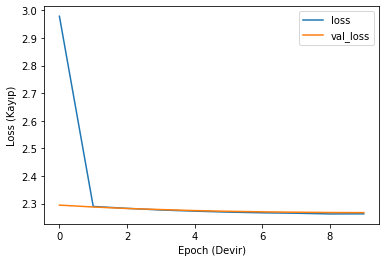

In [13]:
# Create plot of the training loss and validation loss
# Training loss
plt.plot(results.history['loss'], label = 'loss')
# Validation loss
plt.plot(results.history['val_loss'], label = 'val_loss')

# Name the x and y axises
plt.xlabel('Epoch (Devir)')
plt.ylabel('Loss (Kayıp)')

# Put legend table
plt.legend()

# Show the plot
plt.show()

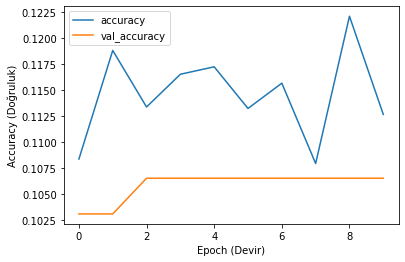

In [14]:
# Create plot of the training accuracy and validation accuracy
# Training accuracy
plt.plot(results.history['accuracy'], label = 'accuracy')


# Validation accuracy
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')

# Name the x and y axises
plt.xlabel('Epoch (Devir)')
plt.ylabel('Accuracy (Doğruluk)')

# Put legend table
plt.legend()

# Show the plot
plt.show()

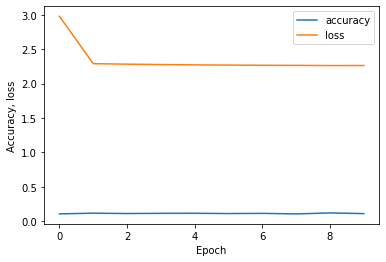

In [15]:
# Loss and accuracy values are in same plot
plt.plot(results.history['accuracy'], label = 'accuracy')
plt.plot(results.history['loss'], label = 'loss')


# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Accuracy, loss')

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [16]:
# Evaluate the performance of model
model.evaluate(x_test, y_test)

28/28 [==============================] - 3s 107ms/step - loss: 2.2692 - accuracy: 0.1041


[2.2692487239837646, 0.10411899536848068]

In [17]:
#HYPERPARAMETER OPTIMIZATION
def hyperparameter(padding = 'same', activation = 'relu', units = 10, optimizer='adam'):
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Conv2D(32,
                              kernel_size = (3,3),
                              strides = (1,1),
                              padding = padding,
                              activation = activation,
                              input_shape = (128,128,1)))

  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Conv2D(64,
                                kernel_size = (3,3),
                                strides = (1,1),
                                padding = padding,
                                activation = activation,))

  model.add(tf.keras.layers.MaxPool2D((2,2)))

  model.add(tf.keras.layers.Conv2D(64,
                                kernel_size = (3,3),
                                strides = (1,1),
                                padding = padding,
                                activation = activation))
  model.add(tf.keras.layers.MaxPool2D((2,2)))


  model.add(tf.keras.layers.MaxPooling2D((2,2)))

  model.add(tf.keras.layers.Flatten())

  
  model.add(tf.keras.layers.Dense(64, activation = activation))
  model.add(tf.keras.layers.Dropout(0.5))

  
  model.add(tf.keras.layers.Dense(64, activation = activation))
  model.add(tf.keras.layers.Dropout(0.5))

  
  model.add(tf.keras.layers.Dense(units, activation='softmax'))

  
  model.compile(optimizer= optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  
  return model



In [18]:
def modelfitting(X_train, y_train, X_val,y_val,batch_size = 128, epochs = 10):
  results = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_val,y_val))
  
  return results

In [19]:
activationL = ['relu', 'sigmoid', 'elu', 'exponential']
scores = []

for i in (activationL):
  model = hyperparameter(activation = i)
  results = modelfitting(x_train, y_train, x_val,y_val,epochs = 10)
  loss_accuracy  = model.evaluate(x_test, y_test)
  scores.append((i, loss_accuracy))  

Epoch 1/10
55/55 [==============================] - 178s 3s/step - loss: 3.1590 - accuracy: 0.1120 - val_loss: 2.2943 - val_accuracy: 0.1145
Epoch 2/10
55/55 [==============================] - 177s 3s/step - loss: 2.2899 - accuracy: 0.1137 - val_loss: 2.2864 - val_accuracy: 0.1145
Epoch 3/10
55/55 [==============================] - 176s 3s/step - loss: 2.2826 - accuracy: 0.1110 - val_loss: 2.2799 - val_accuracy: 0.1145
Epoch 4/10
55/55 [==============================] - 177s 3s/step - loss: 2.2750 - accuracy: 0.1191 - val_loss: 2.2748 - val_accuracy: 0.1145
Epoch 5/10
55/55 [==============================] - 176s 3s/step - loss: 2.2701 - accuracy: 0.1193 - val_loss: 2.2710 - val_accuracy: 0.1145
Epoch 6/10
55/55 [==============================] - 177s 3s/step - loss: 2.2671 - accuracy: 0.1131 - val_loss: 2.2686 - val_accuracy: 0.1145
Epoch 7/10
55/55 [==============================] - 177s 3s/step - loss: 2.2640 - accuracy: 0.1151 - val_loss: 2.2670 - val_accuracy: 0.1145
Epoch 8/10
55

In [20]:
for i in scores:
  print(i)

('relu', [2.2680087089538574, 0.10640732198953629])
('sigmoid', [2.268937349319458, 0.10640732198953629])
('elu', [2.2742156982421875, 0.1224256306886673])
('exponential', [nan, 0.09954233467578888])


There is the results of the hyperparameter optimization;
Elu activation function is better than others about accuracy value. Furthermore, reLu is better than others about loss value.